# Random Forest + Linear Regression

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = './Cleaned_Medical_Data.csv'
medical_data = pd.read_csv(data_path)

x = medical_data.iloc[:, :16]
y = medical_data.iloc[:, 16:]

x_cols = x.columns.values
y_cols = y.columns.values
print(f"X: {x_cols}")
print(f"Y: {y_cols}")

X: ['age' 'year' 'sex' 'glang' 'part' 'job' 'stud_h' 'health' 'psyt' 'jspe'
 'qcae_cog' 'qcae_aff' 'amsp' 'erec_mean' 'cesd' 'stai_t']
Y: ['mbi_ex' 'mbi_cy' 'mbi_ea']


count    26.000000
mean     31.923077
std      21.425075
min       2.000000
25%      11.750000
50%      31.000000
75%      49.500000
max      69.000000
Name: count, dtype: float64


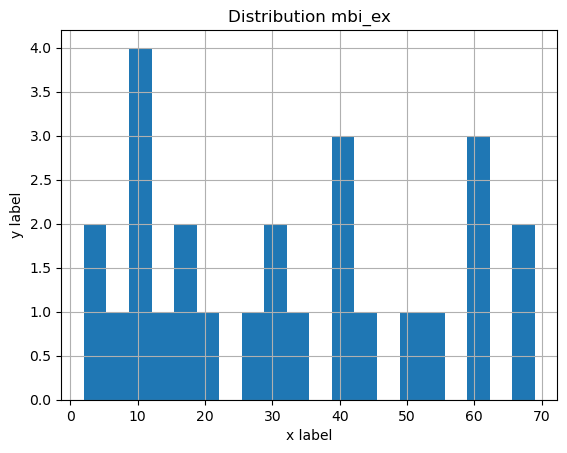

count    20.000000
mean     41.500000
std      26.768992
min       2.000000
25%      16.750000
50%      41.500000
75%      66.000000
max      79.000000
Name: count, dtype: float64


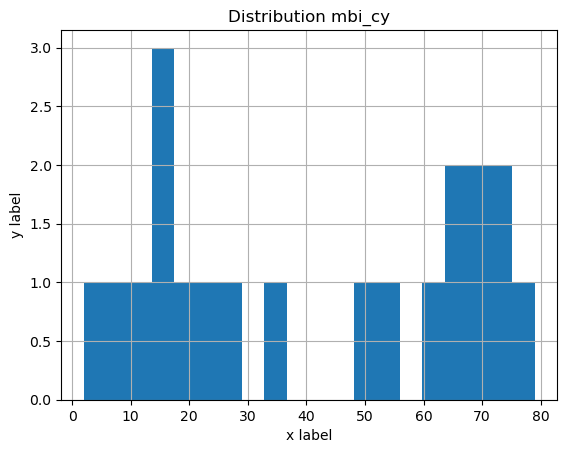

count    26.000000
mean     31.923077
std      25.483992
min       2.000000
25%       6.500000
50%      26.500000
75%      55.250000
max      75.000000
Name: count, dtype: float64


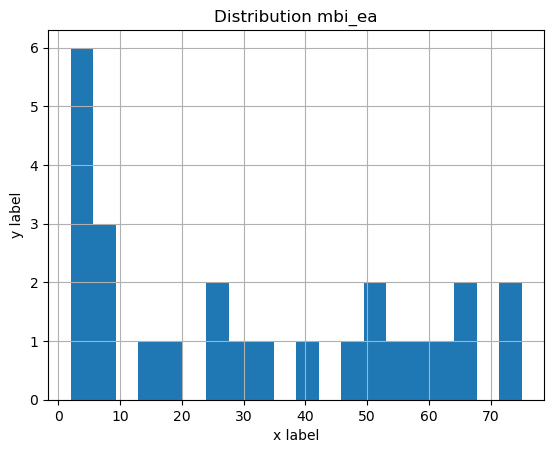

In [73]:
for col in y_cols:
    print(y[col].value_counts().describe())
    y[col].value_counts().hist(bins = 20)
    plt.title(f'Distribution {col}')
    plt.xlabel('x label')
    plt.ylabel('y label')
    plt.show()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression

In [76]:
multi_output_model = LinearRegression()

multi_output_model.fit(x_train, y_train)

y_pred = multi_output_model.predict(x_test)
pred_normal_data = pd.DataFrame(y_pred, columns=y_cols)


mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("\nPredicted Outputs (first 5 rows):")
print(pred_normal_data.head())

print("\nMean Squared Error for each output:", mse)
print("\nR^2 Score for each output:", r2)


Predicted Outputs (first 5 rows):
      mbi_ex     mbi_cy     mbi_ea
0  18.194594   9.968601  24.982160
1  18.122107  10.439617  25.395656
2  15.684971  12.872170  19.572001
3  18.808235  11.416213  21.577496
4  21.534320  12.457437  23.089787

Mean Squared Error for each output: [19.10569374 19.54025107 15.09957975]

R^2 Score for each output: [0.33253399 0.20947605 0.36070183]


## Test Scaler data

In [77]:
# mean of 0 and std of 1 data transformation
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [78]:
multi_output_model = LinearRegression()

multi_output_model.fit(x_train_scaled, y_train)

y_pred = multi_output_model.predict(x_test_scaled)
pred_scaler_data = pd.DataFrame(y_pred, columns=y_cols)


mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("\nPredicted Outputs (first 5 rows):")
print(pred_scaler_data.head())

print("\nMean Squared Error for each output:", mse)
print("\nR^2 Score for each output:", r2)


Predicted Outputs (first 5 rows):
      mbi_ex     mbi_cy     mbi_ea
0  18.194594   9.968601  24.982160
1  18.122107  10.439617  25.395656
2  15.684971  12.872170  19.572001
3  18.808235  11.416213  21.577496
4  21.534320  12.457437  23.089787

Mean Squared Error for each output: [19.10569374 19.54025107 15.09957975]

R^2 Score for each output: [0.33253399 0.20947605 0.36070183]


## Test PCA

Explained Variance Ratio of PCA Components:
Principal Component 1: 0.1759
Principal Component 2: 0.1411
Principal Component 3: 0.0990
Principal Component 4: 0.0758
Principal Component 5: 0.0639
Principal Component 6: 0.0600
Principal Component 7: 0.0574
Principal Component 8: 0.0551


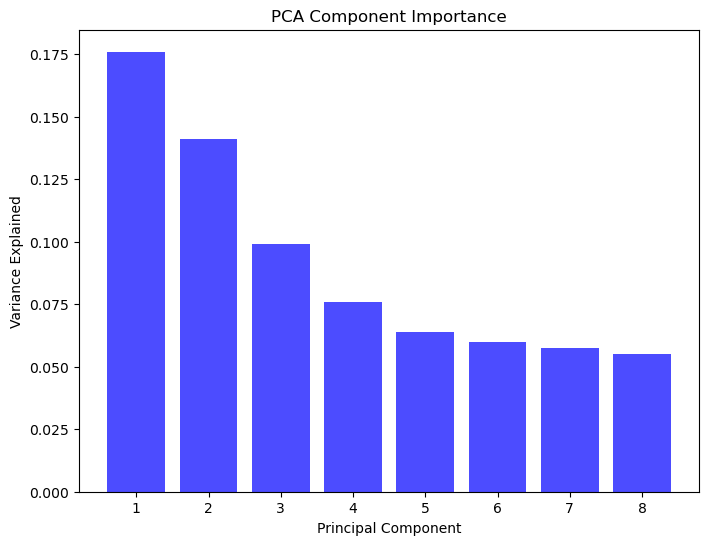

In [79]:
# PCA 
pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Print Explained Variance Ratio
print("Explained Variance Ratio of PCA Components:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

# Visualize the importance of each PCA component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Component Importance')
plt.show()

In [80]:
multi_output_model = LinearRegression()

multi_output_model.fit(x_train_pca, y_train)

y_pred_pca = multi_output_model.predict(x_test_pca)
pred_pca_data = pd.DataFrame(y_pred_pca, columns=y_cols)


mse = mean_squared_error(y_test, y_pred_pca, multioutput='raw_values')
r2 = r2_score(y_test, y_pred_pca, multioutput='raw_values')

print("\nPredicted Outputs (first 5 rows):")
print(pred_pca_data.head())

print("\nMean Squared Error for each output:", mse)
print("\nR^2 Score for each output:", r2)


Predicted Outputs (first 5 rows):
      mbi_ex     mbi_cy     mbi_ea
0  19.367960  10.404836  24.255041
1  17.180870  10.729341  24.774039
2  16.139706  11.227687  20.308018
3  17.878503  10.558714  23.194626
4  19.359049  10.633292  24.348964

Mean Squared Error for each output: [19.76266128 21.41136452 16.07445593]

R^2 Score for each output: [0.30958253 0.13377795 0.31942673]


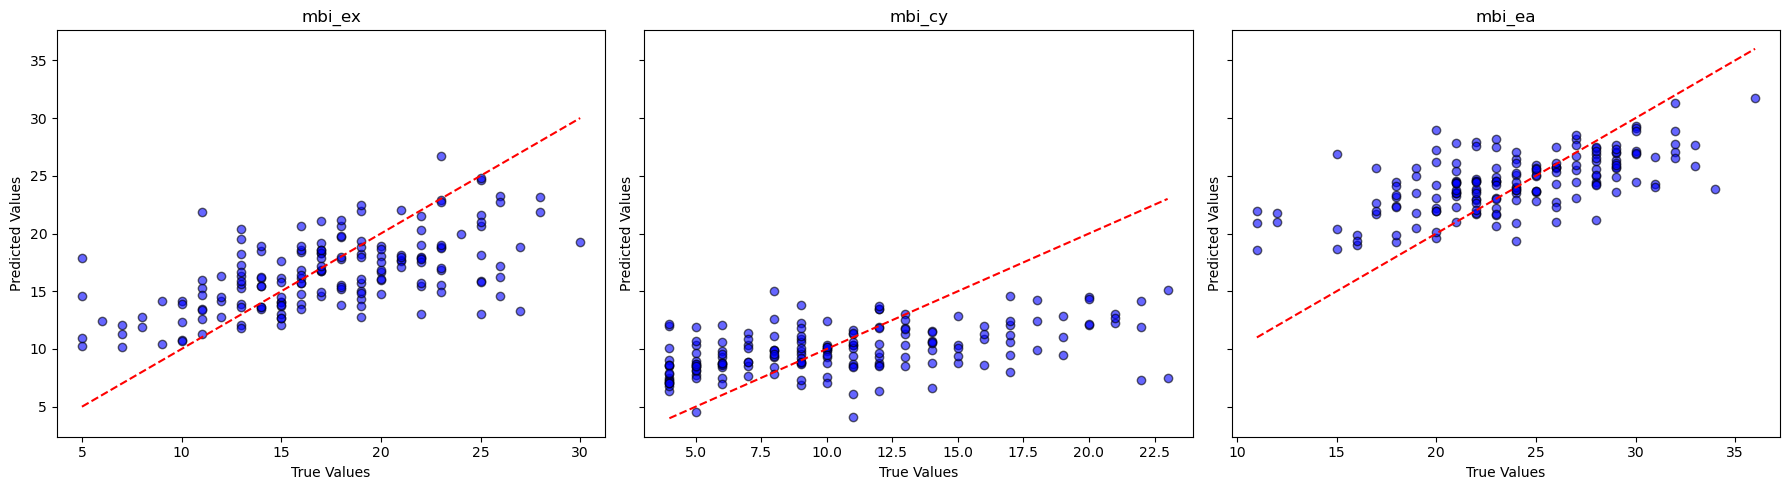

In [81]:
# Create subplots for each target variable
n_targets = y.shape[1]  # Number of target columns
fig, axes = plt.subplots(1, n_targets, figsize=(6 * n_targets, 5), sharey=True)

for i in range(n_targets):
    ax = axes[i] if n_targets > 1 else axes  # Handle single subplot case
    ax.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.6, color='blue', edgecolor='k')
    ax.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
            [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')  # Perfect prediction line
    ax.set_title(f"{y_cols[i]}")
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [82]:
for i in range(3):
    print(y_cols[i])
    test = y_test.iloc[:, i]
    pred = pred_scaler_data.iloc[:, i]
    
    mae = mean_absolute_error(y_true=test,y_pred=pred)
    mse = mean_squared_error(y_true=test,y_pred=pred)
    rmse = root_mean_squared_error(y_true=test,y_pred=pred) 
    print("MAE:",mae) 
    print("MSE:",mse) 
    print("RMSE:",rmse)


mbi_ex
MAE: 3.388578598620793
MSE: 19.105693739959445
RMSE: 4.371006032935604
mbi_cy
MAE: 3.5037250324628655
MSE: 19.540251068713214
RMSE: 4.420435619790567
mbi_ea
MAE: 3.0003903825016525
MSE: 15.099579754427971
RMSE: 3.885817771644467


# Linear Regression + Random Forest parameterize

In [83]:
# Split data for regression models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression for each target in y_cols
print("=== Linear Regression ===")
for target in y_cols:
    lr = LinearRegression()
    lr.fit(x_train, y_train[target])
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    print(f"Target: {target}")
    print(f"Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

# Random Forest (regression)
print("\n=== Random Forest ===")
for target in y_cols:
    # Regression
    rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_reg.fit(x_train, y_train[target])
    y_pred_rf = rf_reg.predict(x_test)
    mse = mean_squared_error(y_test[target], y_pred_rf)
    r2 = r2_score(y_test[target], y_pred_rf)
    print(f"Random Forest Regression for {target}:")
    print(f"Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

=== Linear Regression ===
Target: mbi_ex
Mean Squared Error: 19.1057, R^2 Score: 0.3325
Target: mbi_cy
Mean Squared Error: 19.5403, R^2 Score: 0.2095
Target: mbi_ea
Mean Squared Error: 15.0996, R^2 Score: 0.3607

=== Random Forest ===
Random Forest Regression for mbi_ex:
Mean Squared Error: 18.5545, R^2 Score: 0.3518
Random Forest Regression for mbi_cy:
Mean Squared Error: 20.0839, R^2 Score: 0.1875
Random Forest Regression for mbi_ea:
Mean Squared Error: 15.6860, R^2 Score: 0.3359


In [84]:
# Function to evaluate models
def evaluate_model(model, x_test, y_test, target):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    print(f"{target}: Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

# === Linear Regression ===
print("=== Optimizing Linear Regression ===")
# Linear Regression does not have hyperparameters to tune directly, but you can regularize using Ridge or Lasso
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
for target in y_cols:
    ridge_grid.fit(x_train, y_train[target])
    best_ridge = ridge_grid.best_estimator_
    print(f"Best Ridge alpha for {target}: {ridge_grid.best_params_}")
    evaluate_model(best_ridge, x_test, y_test, target)

# === Random Forest ===
print("\n=== Optimizing Random Forest ===")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

for target in y_cols:
    rf_grid = RandomizedSearchCV(
        RandomForestRegressor(random_state=42), 
        param_distributions=rf_params, 
        n_iter=50, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        random_state=42, 
        n_jobs=-1
    )
    rf_grid.fit(x_train, y_train[target])
    best_rf = rf_grid.best_estimator_
    print(f"Best Random Forest parameters for {target}: {rf_grid.best_params_}")
    evaluate_model(best_rf, x_test, y_test, target)

=== Optimizing Linear Regression ===
Best Ridge alpha for mbi_ex: {'alpha': 0.1}
mbi_ex: Mean Squared Error: 19.0931, R^2 Score: 0.3330
Best Ridge alpha for mbi_cy: {'alpha': 100}
mbi_cy: Mean Squared Error: 19.3560, R^2 Score: 0.2169
Best Ridge alpha for mbi_ea: {'alpha': 100}
mbi_ea: Mean Squared Error: 14.8656, R^2 Score: 0.3706

=== Optimizing Random Forest ===
Best Random Forest parameters for mbi_ex: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
mbi_ex: Mean Squared Error: 18.4945, R^2 Score: 0.3539
Best Random Forest parameters for mbi_cy: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
mbi_cy: Mean Squared Error: 20.1643, R^2 Score: 0.1842
Best Random Forest parameters for mbi_ea: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
mbi_ea: Mean Squared Error: 15.4697, R^2 Score: 0.3450


In [85]:
multi_output_model = LinearRegression()

multi_output_model.fit(x_train_scaled, y_train)

y_pred = multi_output_model.predict(x_test_scaled)
pred_scaler_data = pd.DataFrame(y_pred, columns=y_cols)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("\nPredicted Outputs (first 5 rows):")
print(pred_scaler_data.head())

print("\nMean Squared Error for each output:", mse)
print("\nR^2 Score for each output:", r2)


Predicted Outputs (first 5 rows):
      mbi_ex     mbi_cy     mbi_ea
0  18.194594   9.968601  24.982160
1  18.122107  10.439617  25.395656
2  15.684971  12.872170  19.572001
3  18.808235  11.416213  21.577496
4  21.534320  12.457437  23.089787

Mean Squared Error for each output: [19.10569374 19.54025107 15.09957975]

R^2 Score for each output: [0.33253399 0.20947605 0.36070183]


In [86]:
rf_reg = RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=10, bootstrap=True, random_state=42)
rf_reg.fit(x_train_scaled, y_train)
y_pred_rf = rf_reg.predict(x_test_scaled)
pred_scaler_data_rf = pd.DataFrame(y_pred_rf, columns=y_cols)

mse = mean_squared_error(y_test, y_pred_rf, multioutput='raw_values')
r2 = r2_score(y_test, y_pred_rf, multioutput='raw_values')

print("\nPredicted Outputs (first 5 rows):")
print(pred_scaler_data_rf.head())

print("\nMean Squared Error for each output:", mse)
print("\nR^2 Score for each output:", r2)


Predicted Outputs (first 5 rows):
      mbi_ex     mbi_cy     mbi_ea
0  18.502686   9.616376  24.631951
1  19.274839  10.483465  23.014589
2  18.112810  12.384872  21.176298
3  18.333410  10.684313  22.109206
4  21.331887  12.274401  22.521513

Mean Squared Error for each output: [17.83534132 19.97212445 15.52873089]

R^2 Score for each output: [0.37691432 0.1920041  0.34253208]


# Feature importance

In [87]:
# Split data for regression models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression for each target in y_cols
print("=== Linear Regression ===")
for target in y_cols:
    lr = LinearRegression()
    lr.fit(x_train, y_train[target])
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    print(f"Target: {target}")
    print(f"Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

# Random Forest (regression)
print("\n=== Random Forest ===")
for target in y_cols:
    # Regression
    rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_reg.fit(x_train, y_train[target])
    y_pred_rf = rf_reg.predict(x_test)
    mse = mean_squared_error(y_test[target], y_pred_rf)
    r2 = r2_score(y_test[target], y_pred_rf)
    print(f"Random Forest Regression for {target}:")
    print(f"Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

=== Linear Regression ===
Target: mbi_ex
Mean Squared Error: 19.1057, R^2 Score: 0.3325
Target: mbi_cy
Mean Squared Error: 19.5403, R^2 Score: 0.2095
Target: mbi_ea
Mean Squared Error: 15.0996, R^2 Score: 0.3607

=== Random Forest ===
Random Forest Regression for mbi_ex:
Mean Squared Error: 18.5545, R^2 Score: 0.3518
Random Forest Regression for mbi_cy:
Mean Squared Error: 20.0839, R^2 Score: 0.1875
Random Forest Regression for mbi_ea:
Mean Squared Error: 15.6860, R^2 Score: 0.3359


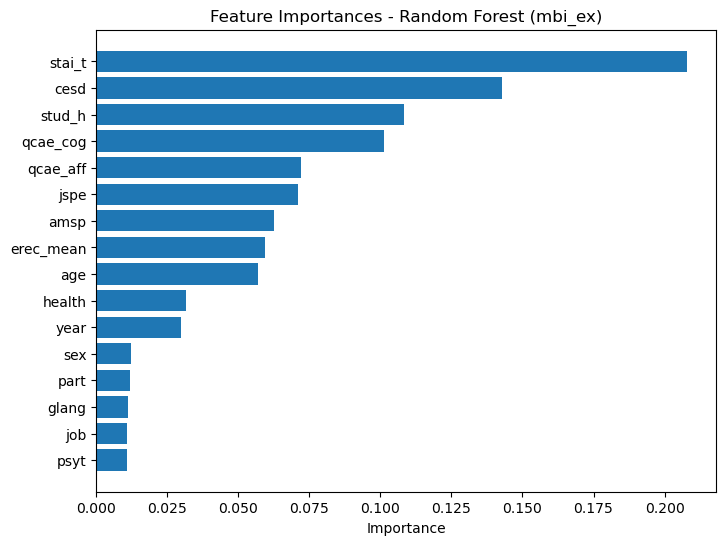

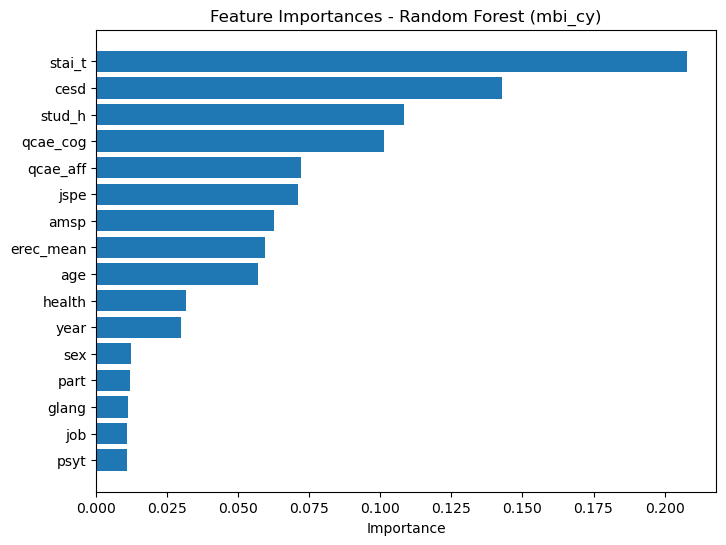

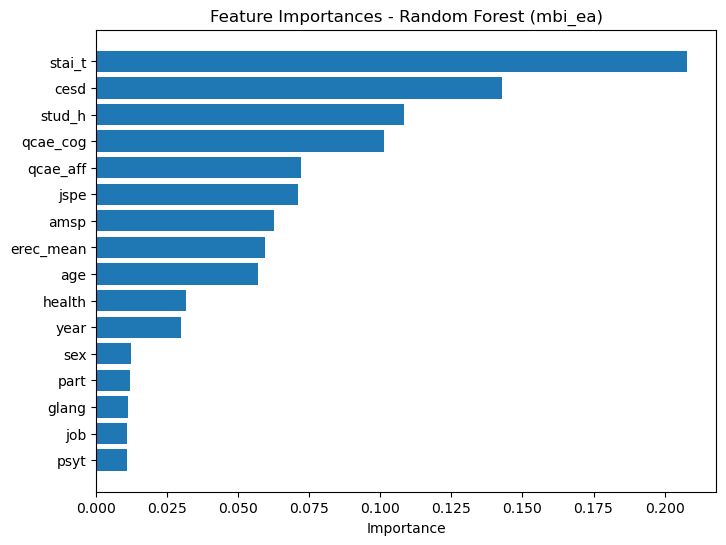

In [88]:
for target in y_cols:
    feature_importances = rf_reg.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(x.columns)[sorted_idx])
    plt.title(f"Feature Importances - Random Forest ({target})")
    plt.xlabel("Importance")
    plt.show()
